## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

!pip install -U pyarrow

from google.colab import drive
drive.mount('/content/gdrive')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


     |████████████████████████████████| 17.3MB 228kB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1
Mounted at /content/gdrive


In [ ]:
!unzip -P Skoltech gdrive/My\ Drive/Skoltech\ Courses/HackLab/Lenta/hack_data.zip

Archive:  gdrive/My Drive/Skoltech Courses/HackLab/Lenta/hack_data.zip
  inflating: clients.csv             
  inflating: materials.csv           
  inflating: plants.csv              
  inflating: transactions.parquet    


In [ ]:
clients = pd.read_csv('clients.csv')
materials = pd.read_csv('materials.csv')
plants = pd.read_csv('plants.csv')
trans = pd.read_parquet('transactions.parquet', engine='pyarrow', use_threads=True)

## Transactions

In [ ]:
trans.shape

(32109414, 9)

Интервал данных 2016-10-04  -  2017-10-04

In [ ]:
dates = pd.DataFrame(data = {'chq_date': trans.chq_date.unique()})
dates

,chq_date
0,2016-11-01
1,2016-11-02
2,2016-11-03
3,2016-11-04
4,2016-11-13
...,...
361,2016-10-27
362,2016-10-22
363,2016-10-29
364,2016-10-23


In [ ]:
trans.head(30)

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.000,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.000,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.000,53.98,1
5,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,001,90fca68123e692a005a4edeadd94b2f2,76608b1b1d38384fcac3e2b14e6ec0c9,2.000,64.78,1
6,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,006,90fca68123e692a005a4edeadd94b2f2,86069eddeab2b94b00eca5801628c879,0.728,65.51,0
7,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,010,90fca68123e692a005a4edeadd94b2f2,cd8645ab842a98332560a07d137aed24,1.000,36.99,1
8,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,007,90fca68123e692a005a4edeadd94b2f2,f6f07df28266b03cb7822b62abf0a385,2.000,72.99,1
9,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,005,90fca68123e692a005a4edeadd94b2f2,b726b2ec8d0643d38e29d96733153dd4,2.000,51.98,1


In [ ]:
test = trans.sort_values(by='chq_date')# .head(10000000)

1212ff8ecf53aebef093ca8ae216db68

сезонность 55ad93c2949b2ac7b3c0fe4dae8ead3d

In [ ]:
mat = '1212ff8ecf53aebef093ca8ae216db68	'
plant = '7cd86ecb09aa48c6e620b340f6a74592'
test1 = test.loc[(test['material'] == mat) & (test['plant'] == plant)]
test1.shape

(0, 9)

In [ ]:
s = 22

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [ ]:
trans.material[s]

'9136b34daa7202b248cfefa498822c34'

Text(0, 0.5, 'Sales amount')

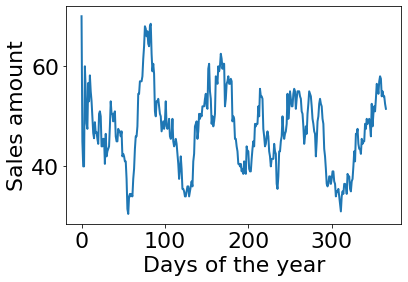

In [ ]:
mat = trans.material[s]
#mat = 'b75147feae4cf8ec07fb5f2cef855def'
test1 = test.loc[test['material'] == mat]
y = test1.groupby(['chq_date', 'material']).sum()
fin = pd.merge(dates, y.reset_index(), on='chq_date', how='outer').fillna(0).sort_values('chq_date')
fin['material'] = mat
fin = fin.reset_index()
plt.plot(fin.sales_count.rolling(window=20, min_periods=1).mean()*10, linewidth=2)
plt.xlabel("Days of the year")
plt.ylabel("Sales amount")
#plt.title("Sales of the favourite product - 281ff47087464d3f747d7acd71f9dcd6")

In [ ]:
mat = '33fa1fd7d0c11ccde404416d63e9b50a'
test1 = test.loc[test['material'] == mat]
test1.shape

(2005, 9)

In [ ]:
y = test1.groupby(['chq_date', 'material']).sum()
y

,,sales_count,sales_sum,is_promo
chq_date,material,,,
2016-10-04,33fa1fd7d0c11ccde404416d63e9b50a,3.0,2092.40,1
2016-10-05,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1544.92,0
2016-10-06,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1374.78,0
2016-10-08,33fa1fd7d0c11ccde404416d63e9b50a,1.0,599.79,0
2016-10-09,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1488.49,0
...,...,...,...,...
2017-09-28,33fa1fd7d0c11ccde404416d63e9b50a,3.0,2033.27,0
2017-09-30,33fa1fd7d0c11ccde404416d63e9b50a,5.0,3333.99,0
2017-10-02,33fa1fd7d0c11ccde404416d63e9b50a,4.0,2999.43,0


In [ ]:
fin = pd.merge(dates, y.reset_index(), on='chq_date', how='outer').fillna(0).sort_values('chq_date')
fin['material'] = mat
fin = fin.reset_index()
fin

,index,chq_date,material,sales_count,sales_sum,is_promo
0,220,2016-10-04,33fa1fd7d0c11ccde404416d63e9b50a,3.0,2092.40,1.0
1,237,2016-10-05,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1544.92,0.0
2,257,2016-10-06,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1374.78,0.0
3,273,2016-10-07,33fa1fd7d0c11ccde404416d63e9b50a,0.0,0.00,0.0
4,295,2016-10-08,33fa1fd7d0c11ccde404416d63e9b50a,1.0,599.79,0.0
...,...,...,...,...,...,...
361,224,2017-09-30,33fa1fd7d0c11ccde404416d63e9b50a,5.0,3333.99,0.0
362,352,2017-10-01,33fa1fd7d0c11ccde404416d63e9b50a,0.0,0.00,0.0
363,196,2017-10-02,33fa1fd7d0c11ccde404416d63e9b50a,4.0,2999.43,0.0
364,197,2017-10-03,33fa1fd7d0c11ccde404416d63e9b50a,2.0,1159.00,2.0


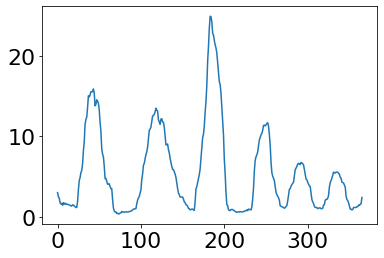

In [ ]:
plt.plot(fin.sales_count.rolling(window=20, min_periods=1).mean())

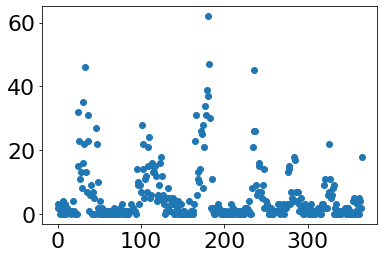

In [ ]:
plt.scatter(fin.index, fin.sales_count)

In [ ]:
y = test.groupby(['material']).sum()
y

,sales_count,sales_sum,is_promo
material,,,
000062284ffb915ba6b88a36e3cb7ba8,55.000,2763.00,6
00011c1252f877221e0e0a3ddf21858e,225.000,36722.53,128
000189cbec3b82946747db131d67805a,283.000,14758.01,48
000273bf6eb4ba9a2ec52c0b5ee564ed,2842.422,798334.62,2511
00033dd12618c86f7451b1e18af8bb60,136.000,37525.12,119
...,...,...,...
fffe0dced2748225d104997dd097e1ee,64.000,4962.05,60
fffe26ba1322542f2cafe284ae5eda5c,13.000,2180.21,6
fffe733d307911ecb0fb595168118bfb,3.000,2892.37,3


In [ ]:
y.reset_index()['sales_count'].argsort()

0         36899
1         96568
2          8643
3          2381
4         64384
          ...  
105689    75428
105690     8163
105691    40490
105692    24039
105693    75536
Name: sales_count, Length: 105694, dtype: int64

In [ ]:
y.reset_index().material[y['sales_count'].nlargest(1)]

sales_count
898142.0    NaN
Name: material, dtype: object

In [ ]:
trans.sort_values(by='chq_date').groupby(['material'])

In [ ]:
x = trans.groupby(['client_id', 'chq_id']).sum()

In [ ]:
x

sales_count  ...  is_promo
client_id                        chq_id                                         ...          
0000d48a8891cd462fdf01ea861ec53e 06c8917969c640e22d94ef876d195ebd        8.594  ...         0
                                 07296c20aef47baa760bbecef9e5458b       16.866  ...        11
                                 229bd1cf3168e342447c451594b1a24d       32.498  ...         5
                                 23732c893fa67ebb0dc5a30f701512f2       45.537  ...         8
                                 272d955e9fa15e17c0f9089bdf6283cd       27.618  ...         2
...                                                                        ...  ...       ...
fffc477269ae5f219e39aa51fa7abb81 da4a5469540e86268327d544b4f66474       29.628  ...        12
                                 eb52b8b32c1af950aee99357c13b4bb3       72.678  ...        12
fffd3e78e3ea6bf00aee1372efc09dad 631f77285180657dd00b5051ebad22ae       13.686  ...         5
                                 65a48d8c83eff22f5ccab0cd3319b3c5       12.000  ...         1
                                 cfd98a3011c3907c7614efbcac693d7e        4.208  ...         1

[2964775 rows x 3 columns]

In [ ]:
trans.groupby(['client_id', 'chq_id']).sum().mean() 

sales_count      14.287657
sales_sum      1330.903218
is_promo          5.235194
dtype: float64

In [ ]:
x.mean() # средние для всего датасета

sales_count      14.287657
sales_sum      1330.903218
is_promo          5.235194
dtype: float64

In [ ]:
x.groupby(['client_id']).mean().mean() # средние для каждого человека

sales_count      15.051324
sales_sum      1458.546350
is_promo          5.451248
dtype: float64

In [ ]:
trans1 = trans.head(15)

In [ ]:
trans1.head(5)

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.0,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.0,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.0,53.98,1


In [ ]:
x = trans[(trans.material == '571c6d3b559db8445e05265649eb30ab') & (trans.is_promo == 0)]

In [ ]:
y = trans[(trans.material == '571c6d3b559db8445e05265649eb30ab') & (trans.is_promo == 1)]

In [ ]:
(x.sales_sum / x.sales_count).mean(), (x.sales_sum / x.sales_count).max()

(29.618266798791993, 43.79)

In [ ]:
(y.sales_sum / y.sales_count).mean(), (y.sales_sum / y.sales_count).max()

(24.41210848861266, 37.79)

In [ ]:
prices = trans1.sales_sum / trans1.sales_count

In [ ]:
prices

0      73.490000
1     249.990000
2      47.990000
3      47.990000
4      26.990000
5      32.390000
6      89.986264
7      36.990000
8      36.495000
9      25.990000
10    549.940000
11    179.990000
12     64.890000
13     81.500000
14     99.990000
dtype: float64

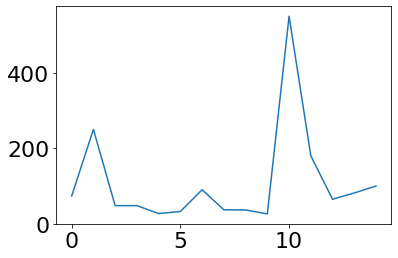

In [ ]:
plt.plot(prices)

In [ ]:
def get_weighted_popularity_of_material_by_user(trans):
  size_groups = trans.groupby('chq_id').size()
  trans['num_trans'] = trans.progress_apply(axis=1, func=lambda x: size_groups.loc[x['chq_id']])
  clientid2num_trans = dict(trans[['client_id', 'num_trans']].drop_duplicates().values)

  groups_material = trans.groupby('material')

  material_by_on_average = {}
  for material_id in tqdm(trans.material.unique()):
    a = groups_material.get_group(material_id).groupby('client_id').size().mean()
    material_by_on_average[material_id] = a
  
  groups = trans.groupby(['client_id', 'material'])
  size_groups = groups.size().to_frame()
  size_groups.reset_index(level=0, inplace=True)
  size_groups.reset_index(level=0, inplace=True)

  size_groups['weighted'] = size_groups.progress_apply(axis=1, func=lambda x: (x[0] / clientid2num_trans[x['client_id']]) / material_by_on_average.get(x['material'], None))
  size_groups['material_weight'] = size_groups.apply(axis=1, func=lambda x: material_by_on_average.get(x['material'], None))
  return size_groups


df = get_weighted_popularity_of_material_by_user(trans.sample(frac=0.1))
df.sort_values('weighted', ascending=False)

,material,client_id,0,weighted,material_weight
119124,c8ac520562ba934dd67cbf0f060c4252,0b1b96c791f5779ad006171187b2d31e,68,43.757150,1.554032
739195,6278f48a43fb0a23036b3a11c92e726c,4341c3b1a1c9d78a7c27e4c11ec7eb2f,56,33.185130,1.687503
1738723,c8ac520562ba934dd67cbf0f060c4252,9e486ace04de5e3b2529d76d115dcbba,48,30.887400,1.554032
1495376,dae7d75b88843c9206161413df59e45b,885b34655c440af288c8cf29e1a13487,37,28.510274,1.297778
2131757,1212ff8ecf53aebef093ca8ae216db68,c1a54f2639e7b29099a11940e3dff4b0,48,27.508409,1.744921
...,...,...,...,...,...
246385,00dd66971e21a68bb052882103bec2a1,16abc7202df8f361a04faf8a9b137228,1,0.029514,5.647059
2116415,9b81cf0df5ce29339fb3b3215f001bd9,c008e0daa31499b90957f1b3c8952c51,1,0.028571,7.000000
1032205,b75147feae4cf8ec07fb5f2cef855def,5e6bcea5aa0e8d4f35ff5e0bff0746f4,1,0.023398,2.035147
1666013,00dd66971e21a68bb052882103bec2a1,977fa438981f88c766172173ff10bb58,1,0.019676,5.647059


In [ ]:
df.sort_values('material_weight')

,material,client_id,0,weighted,material_weight
743939,de67d7aa29750ced1814c1f62c89ed56,439e840f34e596cc755cf3449da501af,1,0.500000,1.00
1303040,fe8650501d8ed62e0b761adba3bdeed6,76fd33b33a43eb8e5fe301e583577fe1,1,0.500000,1.00
1303034,a842425867b22c0d6b522570cb97a78c,76fd33b33a43eb8e5fe301e583577fe1,1,0.500000,1.00
1303033,a291a3aff7b2424b27c3288d29aa0c8e,76fd33b33a43eb8e5fe301e583577fe1,1,0.500000,1.00
2017865,bf2256650a157303c3fd95d80df49b0d,b75aefd8f77dae8548f73819d0fc9ae6,1,0.250000,1.00
...,...,...,...,...,...
2229668,0256c8bd930742622e3999a3f0e9e643,ca5e797c10d3723d25cfd5b2385f4c94,7,0.169697,8.25
887308,0256c8bd930742622e3999a3f0e9e643,51173b64400d7d931e5bf02f3f9a31b8,3,0.072727,8.25
2521004,0256c8bd930742622e3999a3f0e9e643,e3f84b5d7bb308db5beaa56345523f82,1,0.017316,8.25
1573364,0256c8bd930742622e3999a3f0e9e643,8f5f1be78aa8472a364e2845bc3adcbe,22,0.444444,8.25


Text(0.5, 1.0, 'Green - favorite product in the basket.\nRed - no favorite product in the basket.')

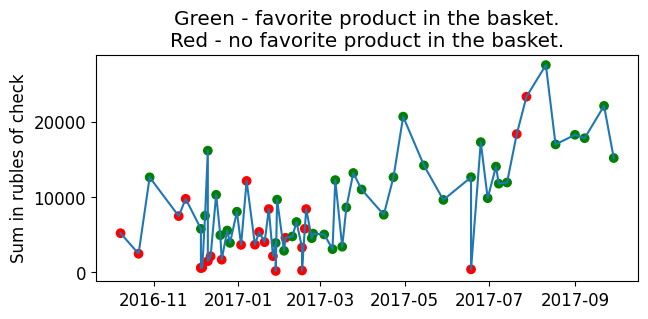

In [ ]:
plt.rcParams.update({'font.size': 12})

client_id = '3ca33bd5a3ed90e1d6bf5e0fd1ec2a41'

df4plot = {'chq_date': [], 'sales_sum': [], 'is_fav_mat_present': [], 'client_id': []}
_df = trans[trans['client_id'] == client_id]
favorite_material = df[df['client_id'] == client_id].sort_values('material_weight').iloc[-1]['material']
groups = _df.groupby('chq_id')

for chq_id in _df.sort_values('chq_date')['chq_id'].unique():
  group = groups.get_group(chq_id)
  date = group['chq_date'].values[0]
  sales_sum = group['sales_sum'].sum()
  
  df4plot['is_fav_mat_present'].append((group['material'] == favorite_material).any())
  df4plot['chq_date'].append(date)
  df4plot['sales_sum'].append(sales_sum)
  df4plot['client_id'].append(client_id)


plt.figure(num=None, figsize=(7, 3), dpi=100, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.plot(df4plot['chq_date'], df4plot['sales_sum'])
ax.scatter(df4plot['chq_date'], df4plot['sales_sum'], c=['green' if isfav == True else 'red' for isfav in df4plot['is_fav_mat_present']])
ax.set_ylabel('Sum in rubles of check')
ax.set_title('Green - favorite product in the basket.\nRed - no favorite product in the basket.')

## Clients

In [ ]:
clients.head(10)

,client_id,gender,city,birthyear
0,1a47d62dddacc03fe90c15652f7ae1a4,M,Other,1990.0
1,9cb909f701d25d548e953bff81192b56,F,Other,1969.0
2,d5da0f5b841b4f83383202807995027a,M,Other,1976.0
3,13ed7f16810b17b8cee6de834ac79a48,F,Moscow,1966.0
4,215fe3ea7d5bf0415e5504e2a7f33551,F,Other,1988.0
5,f37a3565c6b19888c6a70fb606411577,F,Moscow,1987.0
6,956875adb8eb120e9121a68e2ccac61d,F,Other,1997.0
7,6aa7be76ebbe2a18ca0de9a9bc133970,F,Other,1948.0
8,e2f21dcfe01938a1bf74dc993715c22f,F,Other,1984.0
9,d89495d527574eb62ef276bca91c2e80,F,Other,1952.0


99995 - клиентов

In [ ]:
clients.city.value_counts()

Other             81207
St. Petersburg    13374
Moscow             5414
Name: city, dtype: int64

## Materials

In [ ]:
materials.head(10)

,material,hier_level_1,hier_level_2,hier_level_3,hier_level_4,vendor,is_private_label,is_alco
0,35cbdf61de9e19c8b417327aaef14c88,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
1,c0b0bf24d4ec71da3d304f761ec555d8,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,de2eb747e0896c050905a6b635ab800a,9b0b6c7d55413ad3b67761b7b125b534,0,0
2,f0fc5e654a81a7c4b8ba8d7c26546e14,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,8a969031832c535daf96e0c2aed8e814,9b0b6c7d55413ad3b67761b7b125b534,0,0
3,353693e64fb5f9e2d29746d7fe6edf1e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
4,5d9e0b4302ce95448cae72165ff4cf5b,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
5,69374dfb9642c83bd073e1a913af6609,NONFOOD,d2ddea18f00665ce8623e36bd4e3c7c5,f52db9f7c0ae7017ee41f63c2a7353bc,ba4078a37e1d6d97a5d3082b255ac3eb,09c62b77ef54b918fb18662f7f25fc78,0,0
6,f2b2348860378f8b62f8f873bd2ce37e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
7,70505b318edbe5e129bfa15f6c0d85d2,NONFOOD,03afdbd66e7929b125f8597834fa83a4,1dffefa65e27e7187c6c052be0ae02b0,1558ced753948e9206bb1cc3b13026d0,8d69446f1ef3d19eb21f09cce70c08f2,0,0
8,8ffb9236b122c7d5d276054f979741a4,NONFOOD,03afdbd66e7929b125f8597834fa83a4,90e69a6d2ad189b222ac1998abe63aea,343e5c290ef63e64466846bc156d05d0,2ce8cf84d68ae72e62ea72664c8f1daf,0,0
9,c83f771c08a6196d11156e9cc8eb7429,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,828b1eb30921659e22e53a9edc92c4c4,b03838d2abc4863bc2862f7d4ea5aad3,212a38db0ddcd009f1e164cc8483485c,0,0


105609 наименований

In [ ]:
k = 1

In [ ]:
materials['hier_level_4'].unique().shape

In [ ]:
materials['hier_level_4'].unique().shape

(2006,)

In [ ]:
for k in range(100):
  print(materials.loc[materials.hier_level_4 == materials['hier_level_4'].unique()[k]].shape[0])

49
58
45
165
79
16
18
47
226
11
52
71
143
246
58
31
10
75
126
112
217
124
253
127
366
335
244
322
296
292
121
197
258
102
384
26
196
407
624
61
756
90
198
716
787
248
2
14
76
81
33
123
233
375
161
47
6
9
102
70
65
99
249
126
42
54
71
110
350
824
37
252
425
77
231
224
28
212
49
61
277
29
82
350
234
626
189
184
170
40
140
271
285
250
132
111
126
55
68
522


In [ ]:
materials

,material,hier_level_1,hier_level_2,hier_level_3,hier_level_4,vendor,is_private_label,is_alco
0,35cbdf61de9e19c8b417327aaef14c88,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
1,c0b0bf24d4ec71da3d304f761ec555d8,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,de2eb747e0896c050905a6b635ab800a,9b0b6c7d55413ad3b67761b7b125b534,0,0
2,f0fc5e654a81a7c4b8ba8d7c26546e14,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,8a969031832c535daf96e0c2aed8e814,9b0b6c7d55413ad3b67761b7b125b534,0,0
3,353693e64fb5f9e2d29746d7fe6edf1e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
4,5d9e0b4302ce95448cae72165ff4cf5b,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
...,...,...,...,...,...,...,...,...
105604,feeddbacd9eed3bac85b1571ac79e40e,NONFOOD,3295c76acbf4caaed33c36b1b5fc2cb1,11704817e347269b7254e744b5e22dac,e47e165040e2914783a451509bbc8180,8ca0d8745f91fb71551be26b1ca854f4,0,0
105605,e218c4c3676927e53b95a12ffe9e721a,FOOD,02e74f10e0327ad868d138f2b4fdd6f0,df0e09d6f25a15a815563df9827f48fa,a03ddfb4b641e98de3223765162217c3,e3319f2f4767af113d82174f662f2d4e,1,1
105606,9a5e2e34d8406616f5981868b4576444,NONFOOD,fc490ca45c00b1249bbe3554a4fdf6fb,865bf46435bd84fa5d89f64cf3ba7347,e2a75db437bee7d34615fccf32d7a464,546614030cdbddcae3de351852962759,0,0
105607,d208910eb82fa1f57684f793f93521a4,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,90365351ccc7437a1309dc64e4db32a3,ea9cffc9bd2bf8a0fb128d223f6a4282,7f1dbcf6ab15c23093508627ca12b8b1,0,0


In [ ]:
materials.loc[(materials.hier_level_4 == materials['hier_level_4'][k]) & (materials.vendor == '212a38db0ddcd009f1e164cc8483485c')]

,material,hier_level_1,hier_level_2,hier_level_3,hier_level_4,vendor,is_private_label,is_alco
0,35cbdf61de9e19c8b417327aaef14c88,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
6,f2b2348860378f8b62f8f873bd2ce37e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
60114,be961449e5b90c1cbd62211574d414a0,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
77564,00f14fad2e251c8eb9f814bcb48c11b3,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
83570,c1d88a8ab1c81a5fe6100b99e00aec07,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
105052,e6660263d91d9ceafad76eec4fe37704,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0


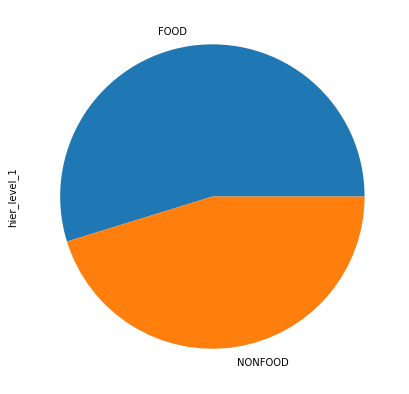

In [ ]:
materials.hier_level_1.value_counts().plot.pie(figsize=(7, 7))

In [ ]:
materials.hier_level_1.value_counts()

FOOD       57847
NONFOOD    47762
Name: hier_level_1, dtype: int64

In [ ]:
materials.is_private_label.value_counts()

0    89101
1    16508
Name: is_private_label, dtype: int64

In [ ]:
materials.is_alco.value_counts()

0    100470
1      5139
Name: is_alco, dtype: int64

In [ ]:
len(materials.hier_level_2.unique()), len(materials.hier_level_3.unique()), len(materials.hier_level_4.unique())

(60, 391, 2006)

## Plants

In [ ]:
plants.head(10)

,plant,plant_type,city
0,95b09698fda1f64af16708ffb859eab9,HM,St. Petersburg
1,926abae84a4bd33c834bc6b981b8cf30,HM,St. Petersburg
2,ae2bac2e4b4da805d01b2952d7e35ba4,HM,St. Petersburg
3,0e7e3cf0ded4d9db8b376b317c007f99,HM,St. Petersburg
4,540bd55a2cf295b8ea9cd78650e89d03,HM,St. Petersburg
5,147768d3955e38c4e662c0a95d807abc,HM,Other
6,2ebe25dd3a566f36f80d55440d3c3834,HM,Other
7,ba1d8b273d67c04097d64fad565a79d9,HM,Other
8,66ff67ba2a11f6975dd7293039ed593e,HM,Other
9,c0f82517af0829daac3a6cf82e9ecc1e,HM,Other


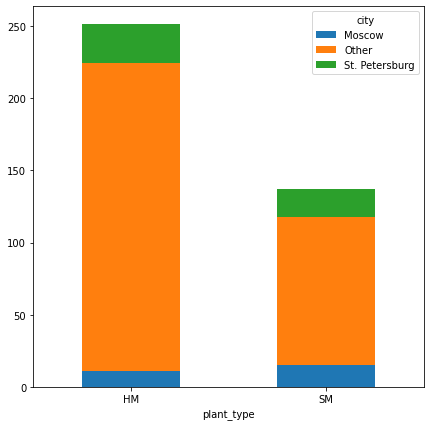

In [ ]:
plants.groupby(['plant_type','city']).count().unstack().plot(kind='bar', y='plant', stacked=True, figsize=(7, 7), rot=0)